In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
data=pd.read_csv("/content/survey.csv")

In [2]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
data.shape      # to know the size of rows and coloumns

(1259, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: >

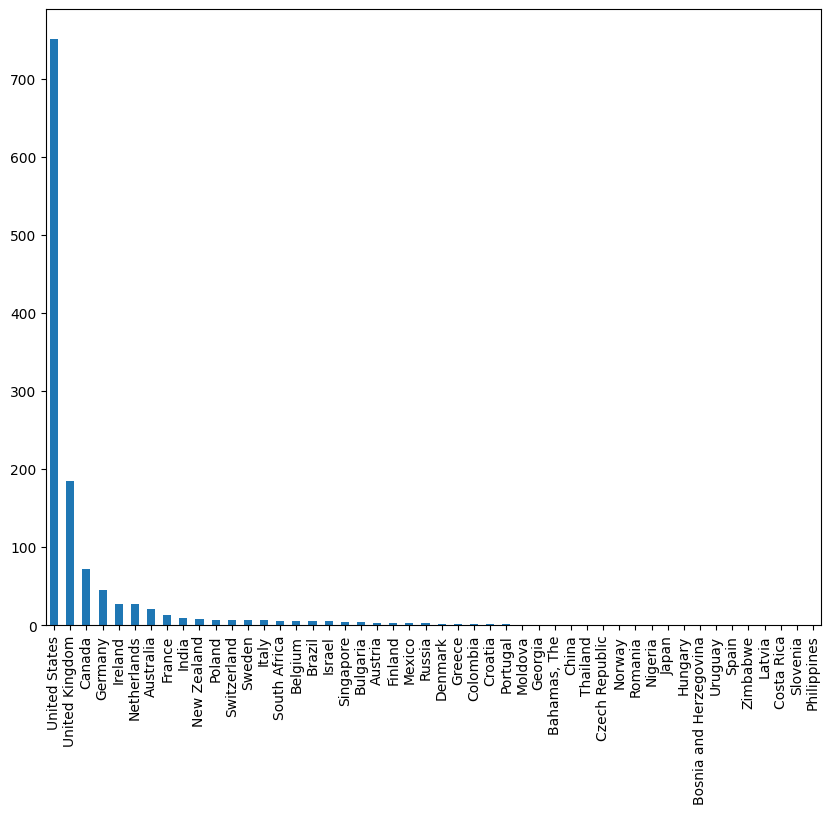

In [5]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [6]:
data = data.drop(columns = ['Country'],axis = 1)  #unevenly distributed

<Axes: >

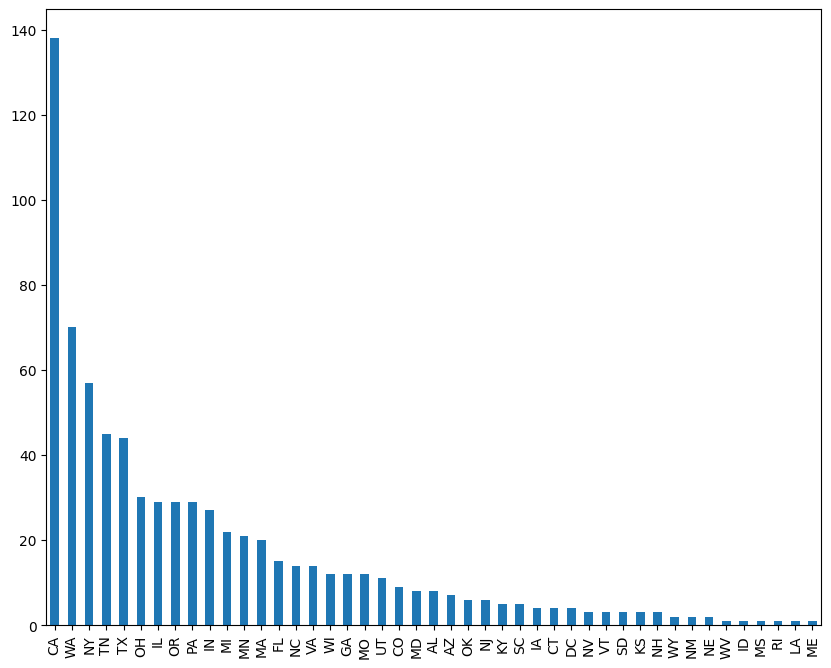

In [7]:
data['state'].value_counts().plot(kind='bar',figsize=(10,8))

In [8]:
data = data.drop(columns = ['state'],axis = 1)  #unevenly distributed

In [9]:
data = data.drop(columns = ['comments'],axis = 1)  #no use for data processing

In [10]:
data = data.drop(columns = ['Timestamp'],axis = 1)  #no use for data processing

In [11]:
data = data.drop(columns = ['no_employees'],axis = 1)  #no use for data processing

Checking the null values

In [12]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [13]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [14]:
data['self_employed'].fillna('No',inplace=True)

In [15]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [16]:
data['work_interfere'].fillna('N/A',inplace=True)

<Axes: >

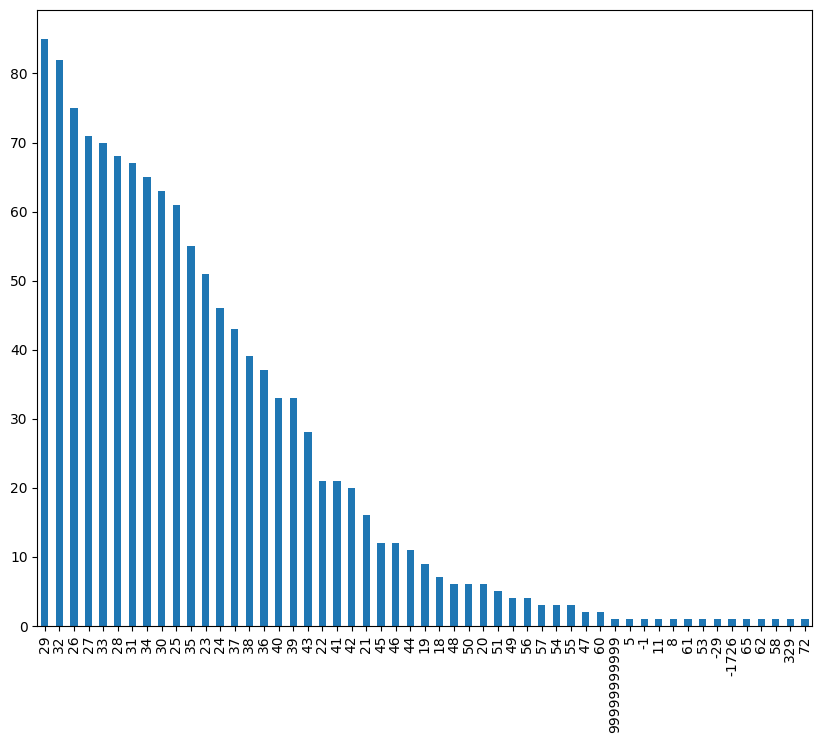

In [17]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [18]:
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace = True)

<Axes: >

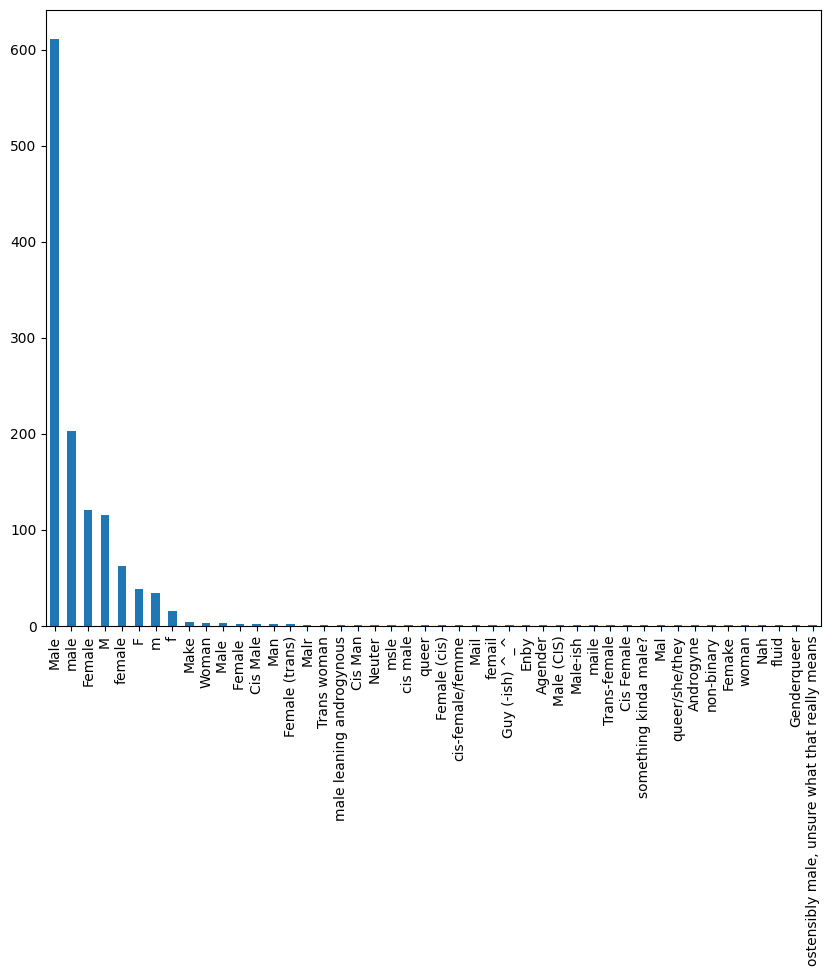

In [19]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

replacing all gender categories into male ,female, non-binary

In [20]:
data['Gender'].replace(['Male', 'male', 'M', 'm', 'Male', 'Cis Male',
                        'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                        'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace=True)

data['Gender'].replace(['Female', 'female', 'F', 'f', 'Woman', 'Female',
                        'femail', 'Cis Female', 'cis-female/femme', 'Femake',
                        'Female (cis)', 'woman', ], 'Female', inplace=True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid',
                        'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                         'Agender', 'A little about you', 'Nah', 'All',
                        'ostensibly male, unsure what that really means', 'Genderqueer',
                        'Enby', 'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman', ], 'Non-Binary', inplace=True)

Uni variate analysis

<ipython-input-21-372e32168379>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

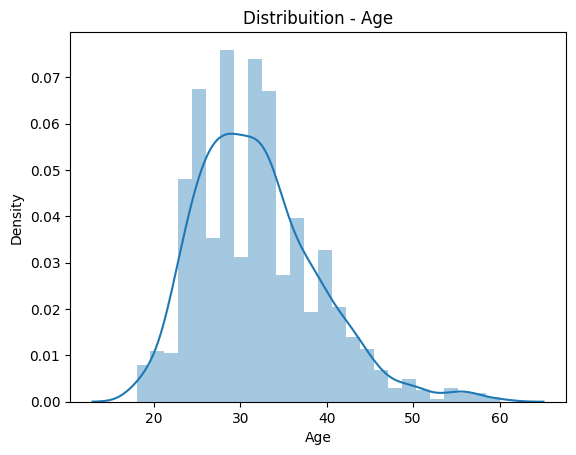

In [21]:
sb.distplot(data["Age"])
plt.title("Distribuition - Age")
plt.xlabel("Age")

Bi-variate analysis

Text(0.5, 1.0, 'Employment Type')

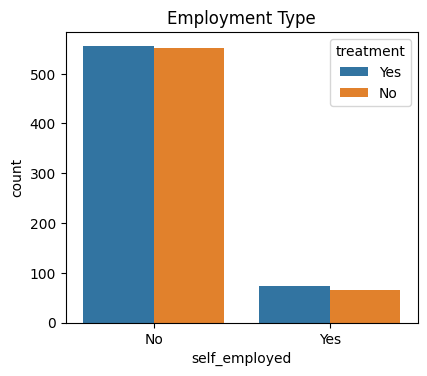

In [22]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data = data,x='self_employed',hue = 'treatment')
plt.title('Employment Type')

Text(0.5, 1.0, 'Family History')

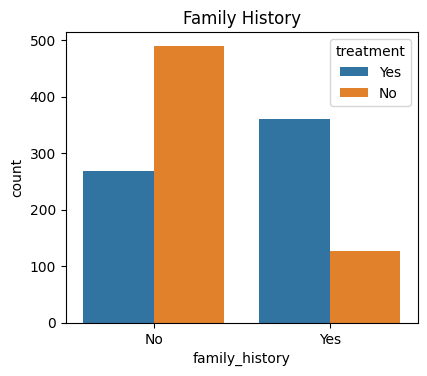

In [23]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(data = data,x='family_history', hue = 'treatment')
plt.title('Family History')

Text(0.5, 1.0, 'Work Interference')

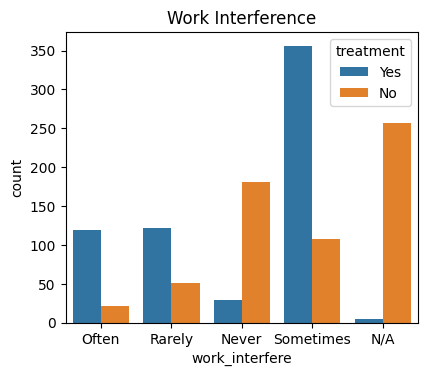

In [24]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(data = data ,x = 'work_interfere', hue ='treatment')
plt.title('Work Interference')

Text(0.5, 1.0, 'work Type')

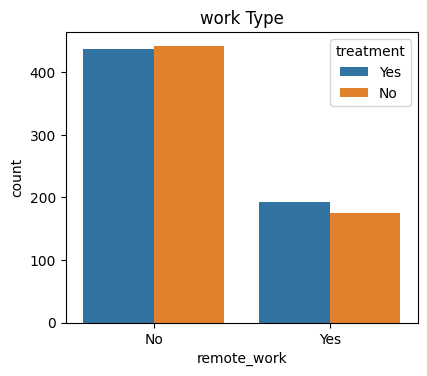

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(data = data , x ='remote_work', hue = 'treatment')
plt.title('work Type')

Text(0.5, 1.0, 'Company')

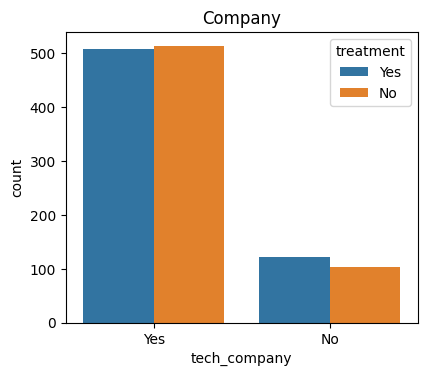

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(data = data , x ='tech_company', hue = 'treatment')
plt.title('Company')

Text(0.5, 1.0, 'Benefits')

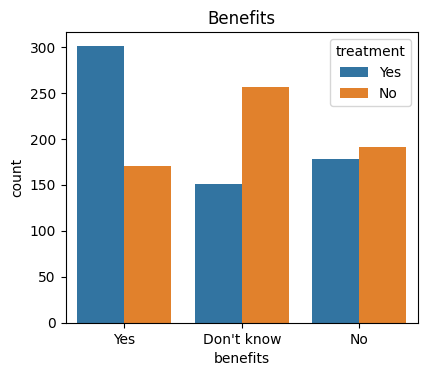

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(data=data,x='benefits', hue = 'treatment')
plt.title('Benefits')

Text(0.5, 1.0, 'Equal importance to Mental and Physical health')

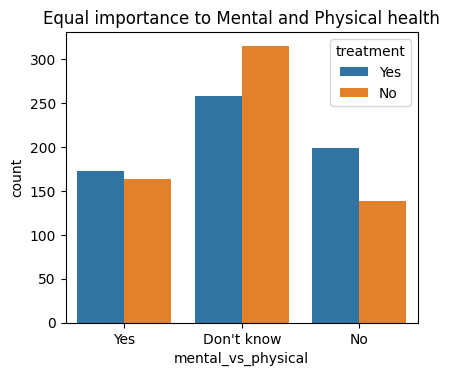

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(data = data , x='mental_vs_physical', hue = 'treatment')
plt.title('Equal importance to Mental and Physical health')

Text(0.5, 1.0, 'Leave')

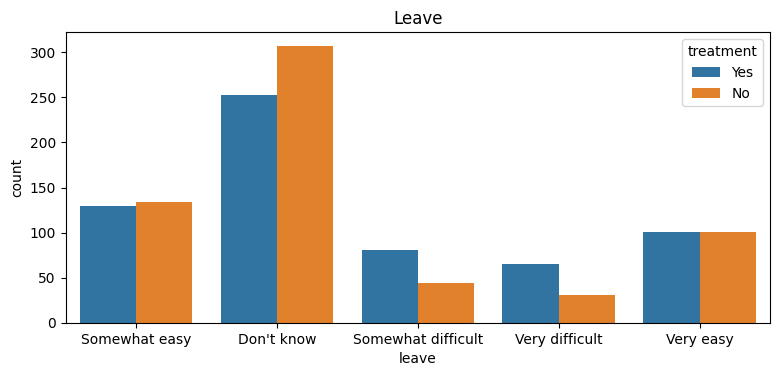

In [29]:
plt.figure(figsize=(20,40))
plt.subplot(9,2,11)
sb.countplot(data = data ,x = 'leave', hue = 'treatment')
plt.title('Leave')

In [30]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,5,2,2,2,5,2,2,3,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,No,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,980,1107,759,630,463,879,1023,471,497,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


seperating the target coloumn and
 encoding the data as there are categorical data

In [31]:
X = data.drop('treatment',axis = 1)  # droping independent variable
y = data['treatment']

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [33]:
ct = ColumnTransformer ([('oe', OrdinalEncoder(), ['Gender', 'self_employed', 'family_history',
                                                    'work_interfere', 'remote_work', 'tech_company',
                                                    'benefits', 'care_options', 'wellness_program', 'seek_help',
                                                    'anonymity', 'leave', 'mental_health_consequence',
                                                    'phys_health_consequence', 'coworkers', 'supervisor',
                                                    'mental_health_interview', 'phys_health_interview',
                                                    'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

In [34]:
X = ct.fit_transform(X)

In [35]:
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

Split into train and split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 49)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((872, 21), (375, 21), (872,), (375,))

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [40]:
model_dict = {}
model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
model_dict['AdaBoost classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier (random_state=49)

In [41]:
def model_test(x_train, x_test, y_train, y_test, model, model_name):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  print("============================================{}============================================".format(model_name))
  print('Score is: {}'.format(accuracy))

  print()

In [42]:
for model_name, model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

============================================Logistic regression============================================
Score is: 0.8426666666666667

============================================KNN Classifier============================================
Score is: 0.8106666666666666

============================================Decision Tree Classifier============================================
Score is: 0.7893333333333333

============================================Random Forest Classifier============================================
Score is: 0.8293333333333334

============================================AdaBoost classifier============================================
Score is: 0.8693333333333333

============================================Gradient Boosting Classifier============================================
Score is: 0.8453333333333334

============================================XGB Classifier============================================
Score is: 0.8213333333333334



In [43]:
# adaBoost Classifier has the best classifier
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost=',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost= 0.8693333333333333


**ROC** CURVE

In [47]:
from sklearn import metrics

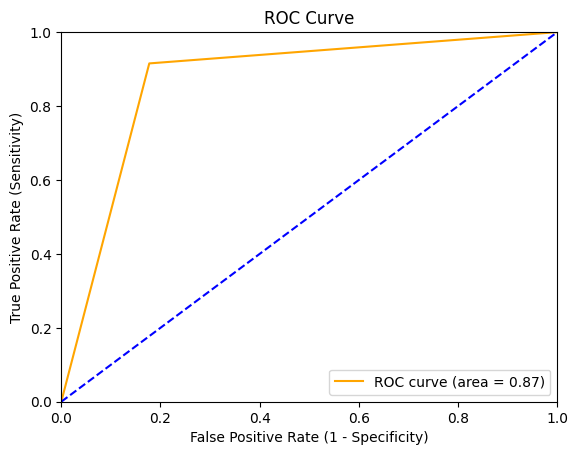

(array([0.        , 0.17741935, 1.        ]),
 array([0.        , 0.91534392, 1.        ]),
 array([2, 1, 0]))

In [49]:
fpr_abc, tpr_abc, thresholds_abc = roc_curve (y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color="orange", label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend (loc="lower right")
plt.show()
roc_curve(y_test, pred_abc)

In [50]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       186
           1       0.84      0.92      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [51]:
import pickle
pickle.dump(abc,open('model.pkl','wb'))

In [55]:
# R- Square
# evaluating testing accuracy
print(metrics.r2_score(y_test,pred_abc))

0.47729988052568706


In [57]:
# MSE (Mean square Error)

print(metrics.mean_squared_error(y_test,pred_abc))

0.13066666666666665


In [58]:
# RMSE (Root Mean Square Error)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_abc)))

0.36147844564602555


In [60]:
cf_matrix =  confusion_matrix(y_test,pred_abc)